In [1]:
from gensim.models import Word2Vec
import pandas as pd
import numpy as np
import os
import scipy
import random
import matplotlib.pyplot as plt
import seaborn as sns
from data_eng_utils import clusters, get_final_vectors

In [2]:
np.random.seed(33)
random.seed(33)

### Set up paths

In [3]:
data='DATA'
raw_data_folder='RAW_DATA'
processed_data_folder='PROCESSED_DATA'
word2vec_folder='word2vec'
tfid_folder='tfid'
final_dict='grp0_dict'

In [4]:
if data not in os.listdir(os.getcwd()):
    os.makedirs(os.path.join(data))
DATA_PATH=os.path.join(data)
if raw_data_folder not in os.listdir(os.path.join(DATA_PATH)):
    os.makedirs(os.path.join(DATA_PATH,raw_data_folder))
RAW_DATA_PATH=os.path.join(DATA_PATH,raw_data_folder)
if processed_data_folder not in os.listdir(os.path.join(DATA_PATH)):
    os.makedirs(os.path.join(DATA_PATH,processed_data_folder))
PROCESSED_DATA_PATH=os.path.join(DATA_PATH,processed_data_folder)

if word2vec_folder not in os.listdir(PROCESSED_DATA_PATH):
    os.makedirs(os.path.join(PROCESSED_DATA_PATH,word2vec_folder))
WORD_2_VEC_PATH=os.path.join(PROCESSED_DATA_PATH,word2vec_folder)
if tfid_folder not in os.listdir(PROCESSED_DATA_PATH):
    os.makedirs(os.path.join(PROCESSED_DATA_PATH,tfid_folder))
TFID_PATH=os.path.join(PROCESSED_DATA_PATH,word2vec_folder)
if final_dict not in os.listdir(PROCESSED_DATA_PATH):
    os.makedirs(os.path.join(PROCESSED_DATA_PATH,final_dict))
GRP0_DICT_PATH=os.path.join(PROCESSED_DATA_PATH,final_dict)

### High level EDA and processing

In [5]:
df=pd.read_csv(os.path.join(RAW_DATA_PATH,'Input Data Translated.csv'), encoding = 'latin-1')

In [22]:
df['final_description']=pd.read_csv(os.path.join(RAW_DATA_PATH,'Features.csv'), encoding = 'latin-1')['Clean Description']

In [23]:
df.head()

,Short description,Description,Caller,Assignment group,Lang_Short_Description,Lang_Description,final description,Grp_change_1,final_description
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,en,en,login issue verify user detail employee manage...,,login issue verify user detail employee manage...
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,en,en,outlook team meeting skype etc not appear cale...,,outlook team meeting skype etc not appear cale...
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,en,en,can not log vpn I not good,,can not log vpn I not good
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,en,en,unable access hr tool page,,unable access hr tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,en,en,skype error,,skype error


Group	Count	Percentage
GRP_0 	 3976 	 46.78 %
GRP_1 	 31 	 0.36 %
GRP_10 	 140 	 1.65 %
GRP_11 	 30 	 0.35 %
GRP_12 	 257 	 3.02 %
GRP_13 	 145 	 1.71 %
GRP_14 	 118 	 1.39 %
GRP_15 	 39 	 0.46 %
GRP_16 	 85 	 1.0 %
GRP_17 	 81 	 0.95 %
GRP_18 	 88 	 1.04 %
GRP_19 	 215 	 2.53 %
GRP_2 	 241 	 2.84 %
GRP_20 	 36 	 0.42 %
GRP_21 	 29 	 0.34 %
GRP_22 	 31 	 0.36 %
GRP_23 	 25 	 0.29 %
GRP_24 	 289 	 3.4 %
GRP_25 	 116 	 1.36 %
GRP_26 	 56 	 0.66 %
GRP_27 	 18 	 0.21 %
GRP_28 	 44 	 0.52 %
GRP_29 	 97 	 1.14 %
GRP_3 	 200 	 2.35 %
GRP_30 	 39 	 0.46 %
GRP_31 	 69 	 0.81 %
GRP_32 	 4 	 0.05 %
GRP_33 	 107 	 1.26 %
GRP_34 	 62 	 0.73 %
GRP_35 	 1 	 0.01 %
GRP_36 	 15 	 0.18 %
GRP_37 	 16 	 0.19 %
GRP_38 	 3 	 0.04 %
GRP_39 	 19 	 0.22 %
GRP_4 	 100 	 1.18 %
GRP_40 	 45 	 0.53 %
GRP_41 	 40 	 0.47 %
GRP_42 	 37 	 0.44 %
GRP_43 	 5 	 0.06 %
GRP_44 	 15 	 0.18 %
GRP_45 	 35 	 0.41 %
GRP_46 	 6 	 0.07 %
GRP_47 	 27 	 0.32 %
GRP_48 	 25 	 0.29 %
GRP_49 	 6 	 0.07 %
GRP_5 	 129 	 1.52 %
GRP_50 	 1

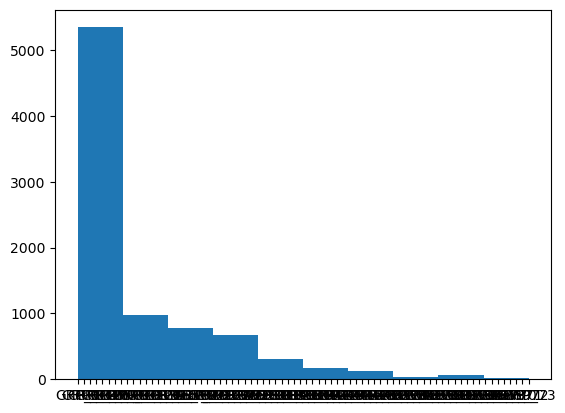

In [24]:
hist_grps=np.unique(df['Assignment group'],return_counts=True)
print(f'Group\tCount\tPercentage')
for x,y in zip(hist_grps[0],hist_grps[1]):
    print(x,'\t',y,'\t',round(y*100/len(df['Assignment group']),2),'%')
plt.hist(df['Assignment group']);

<b> 46% of all tickets are classified as Gr0_0. This is a massively unbalanced dataset

#### 1. Cleaning the data

In [25]:
df['Caller']

0       spxjnwir pjlcoqds
1       hmjdrvpb komuaywn
2       eylqgodm ybqkwiam
3       xbkucsvz gcpydteq
4       owlgqjme qhcozdfx
              ...        
8495    avglmrts vhqmtiua
8496    rbozivdq gmlhrtvp
8497    oybwdsgx oxyhwrfz
8498    ufawcgob aowhxjky
8499    kqvbrspl jyzoklfx
Name: Caller, Length: 8500, dtype: object

In [27]:
df['final_description']=df['final_description'].str.replace('\n'," ")

In [28]:
df ['Grp_change_1']=''

In [29]:
df_grp0=df[df['Assignment group']=='GRP_0'].copy()

In [30]:
df_grp0.shape

(3976, 9)

In [31]:
df_grp0.head()

,Short description,Description,Caller,Assignment group,Lang_Short_Description,Lang_Description,final description,Grp_change_1,final_description
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,en,en,login issue verify user detail employee manage...,,login issue verify user detail employee manage...
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,en,en,outlook team meeting skype etc not appear cale...,,outlook team meeting skype etc not appear cale...
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,en,en,can not log vpn I not good,,can not log vpn I not good
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,en,en,unable access hr tool page,,unable access hr tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,en,en,skype error,,skype error


In [32]:
df_grp0['final_description'].head()

0    login issue verify user detail employee manage...
1    outlook team meeting skype etc not appear cale...
2                           can not log vpn I not good
3                           unable access hr tool page
4                                          skype error
Name: final_description, dtype: object

### Clustering

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### K Means using Word2Vec

#### 1. Create Word2Vec model

In [38]:
sents=df_grp0['final_description']
print(sents.shape)
sent_tokents=[s.split() for s in sents]
print(sents[5])
print(sent_tokents[5])

(3976,)
unable log engineering tool skype
['unable', 'log', 'engineering', 'tool', 'skype']


In [39]:
model = Word2Vec(sentences = sent_tokents,vector_size=8000, window=3, min_count=1, workers=4)
model.save(os.path.join(WORD_2_VEC_PATH,'word2vec_model'))

In [40]:
word_vectors = model.wv

In [42]:
word_vectors.save(os.path.join(WORD_2_VEC_PATH,'word2vec.wordvectors'))

In [43]:
from gensim.models import KeyedVectors
word_vecs_reload = KeyedVectors.load(os.path.join(WORD_2_VEC_PATH,'word2vec.wordvectors'), mmap='r')

In [44]:
print(word_vecs_reload.similarity('access', 'login')) #checking to see if the model is loaded correctly
print(word_vecs_reload.similarity('access', 'skype'))

0.99987257
0.99997616


#### 2. Creating a single vector for each sentence

We have now created a 8000-d vector per <b>word</b>. But for K-means clustering, we need to create a 8000-d vector per <b>sentence</b>. <br>
We calculate the average vector per sentence using the paper 'A simply but tough-to-beat baseline for sentence embeddings' (Arora ,et al.) (https://openreview.net/pdf?id=SyK00v5xx)

Find the probability of occurance of each word in the text

In [45]:
from collections import defaultdict
dict_word_count=defaultdict(int)
for sentence in sents:
    for word in sentence.split():
        dict_word_count[word]+=1
total_word_count=sum(dict_word_count.values())
total_word_count

42576

In [46]:
dict_word_prob={}
for k,v in dict_word_count.items():
    dict_word_prob[k]=v/total_word_count

In [47]:
with open(os.path.join(WORD_2_VEC_PATH,'dict_wordcount'),'w')as f:
    f.write(str(dict_word_count))
f.close()
with open(os.path.join(WORD_2_VEC_PATH,'dict_wordprob'),'w')as f:
    f.write(str(dict_word_prob))
f.close()

#### 3. Converting sentence vectors into average word vectors

In [51]:
vectors_word2vec=get_final_vectors(sents).T

In [52]:
np.save(os.path.join(WORD_2_VEC_PATH,'final_transformed_vectors'),vectors_word2vec)

#### 4. Creating clusters

In [78]:
iters=[i+3 for i in range(30)]

In [ ]:
sse_w2v, scores_w2v=clusters(vectors_word2vec,iters)

In [ ]:
with open(os.path.join(WORD_2_VEC_PATH,'w2v_sse'),'w') as f:
    f.write(str(sse_w2v))
f.close()
with open(os.path.join(WORD_2_VEC_PATH,'w2v_scores'),'w') as f:
    f.write(str(scores_w2v))
f.close()

In [ ]:
plt.figure(figsize=(16, 6))
plt.plot(iters, sse_w2v, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')
plt.show();


In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(iters, scores_w2v, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Silhouette_score')
plt.show();

### Using TFIDF to create vectors

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
sents_TFIDF=df_grp0['final_description']

#### 1. Creating TFID vectors

In [ ]:
vectorizer_tfid=TfidfVectorizer()

In [ ]:
vectors_tfid=vectorizer_tfid.fit_transform(sents_TFIDF)

#### 2.Creating clusters

In [ ]:
iters=[i+3 for i in range(30)]

In [ ]:
sse_tfid, scores_tfid=clusters(vectors_tfid,iters)

In [ ]:
with open(os.path.join(TFID_PATH,'tfid_sse'),'w') as f:
    f.write(str(sse_tfid))
f.close()
with open(os.path.join(TFID_PATH,'tfid_scores'),'w') as f:
    f.write(str(scores_tfid))
f.close()

In [ ]:
plt.figure(figsize=(16, 6))
plt.plot(iters, sse_tfid, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')
plt.show();

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(iters, scores_tfid, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Silhouette_score')
plt.show();

### Analysis of Word2Vec

Word2Vec clearly shows a much higher Silhouette score than TFID with far lower SSE score (order of 1e-12). Hence, we will go ahead with Word2Vec<br><br>
There are two n_cluster values from we need to select the final n_cluster value:
1. Where the silhouette score is highest
2. Where the elbow of the SSE plot is linear

In [76]:
scores_w2v

[0.36864874,
 0.33273524,
 0.31862426,
 0.3093793,
 0.30172515,
 0.3005889,
 0.30789772,
 0.30378044,
 0.27243873,
 0.274649,
 0.28132707,
 0.2968003,
 0.2767741,
 0.27304065,
 0.29095447,
 0.26581076,
 0.27101567,
 0.2668587,
 0.2700394,
 0.27207306,
 0.27209392,
 0.26425898,
 0.27069676,
 0.26719478,
 0.2637628,
 0.27414167,
 0.25874338,
 0.25430903,
 0.25602213,
 0.2533105]

In [75]:
print(f'Highest silhouette score:\t{scores_w2v.index(max(scores_w2v))} is at cluster_size()')

Highest silhouette score:	0


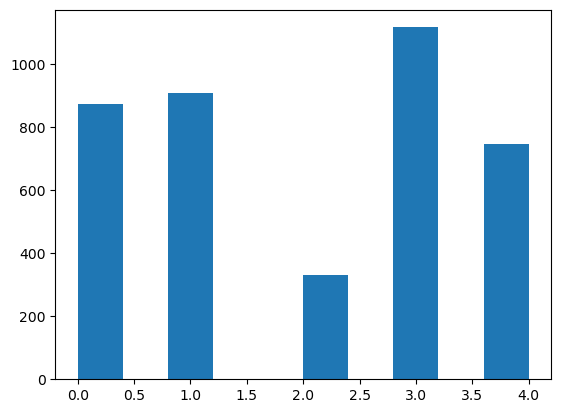

In [70]:
kmeans=KMeans(n_clusters=5)
clusters_k5=kmeans.fit(vectors_word2vec)
plt.hist(clusters_k5.labels_);

In [71]:
unique_5=np.unique(clusters_k5.labels_,return_counts=True)
vals_5=unique_5[1]/clusters_k5.labels_.shape[0]

In [72]:
print(max(vals_5))
print(min(vals_5))

0.2809356136820926
0.08324949698189135


<b>73% of 46.7% (of the total dataset) is 34% of the total dataset that still is highly biased

In [71]:
print('Linear slope at n_cluster=9')

Linear slope at n_cluster=9


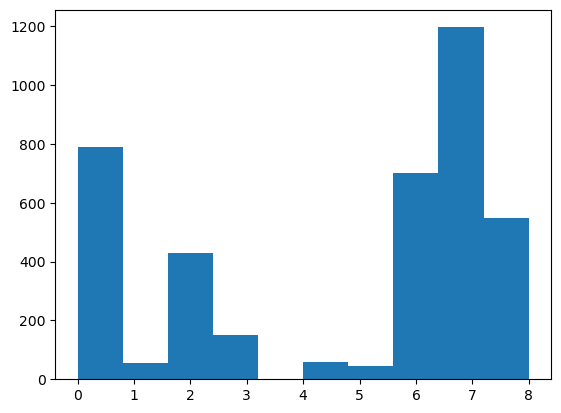

In [73]:
kmeans=KMeans(n_clusters=9)
clusters_9=kmeans.fit(vectors_word2vec)
plt.hist(clusters_9.labels_);

In [74]:
unique_9=np.unique(clusters_9.labels_,return_counts=True)
vals_9=unique_9[1]/clusters_9.labels_.shape[0]

In [76]:
print(max(vals_9))
print(min(vals_9))

0.301056338028169
0.011569416498993963


In [78]:
len(clusters_9.labels_)

3976

30% is the highest frequency within the data and is 14% of the total dataset(30% of 46.7% of the total dataset). We can use this.

### Sub-categorize the grp-0 data

In [81]:
grp_0_cat_dict={}
for k,v in zip(df_grp0['Final_description'],clusters_9.labels_):
    if k in grp_0_cat_dict:
        grp_0_cat_dict[k].append(int(v))
    else:
        grp_0_cat_dict[k]=[int(v)]

In [82]:
c=0
unique_flag=True
for key, vals in grp_0_cat_dict.items():
    if len(vals)>1:
        if len(set(vals))>1:
            unique_flag=False
            grp_0_cat_dict_items[key]=[vals[0]]    
    c+=len(vals)-1
print(c)
print('Are all duplicate values the same:', unique_flag)

47
Are all duplicate values the same: True


In [83]:
len(grp_0_cat_dict.keys())

3929

In [84]:
print(f'All values are either present as a unique value or as a list of similar values for each key:\t{len(grp_0_cat_dict.keys())+c==df_grp0.shape[0]}')

All values are either present as a unique value or as a list of similar values for each key:	True


<b>Hence, there are 560 duplicate values / statements that are mapped out to the same key</b>

In [85]:
for key, vals in grp_0_cat_dict.items():
    grp_0_cat_dict[key]=set(vals).pop() 

#### Writing the dictionary to disk for future reference

In [86]:
import json

In [87]:
json_dump = json.dumps(grp_0_cat_dict)

In [102]:
with open(os.path.join(GRP0_DICT_PATH,'grp0_dictionary.json'),"w") as f:
    f.write(json_dump)
f.close()

In [103]:
f.close()

In [104]:
for k in grp_0_cat_dict.keys():
    print(k)
    break

login issue -verified user details.(employee# & manager name) -checked the user name in ad and reset the password. -advised the user to login and check. -caller confirmed that he was able to login. -issue resolved. spxjnwir pjlcoqds


In [105]:
with open(os.path.join(GRP0_DICT_PATH,'grp0_dictionary.json'),"r") as f:
    grp_0_cat_dict=json.load(f)

In [106]:
#Update new column Grp_change_1
assess=[]
indexes=[]
for k,v in grp_0_cat_dict.items():
    if k in df['Final_description'].values:
        indices=df.index[df['Final_description'].values == k].tolist()
        for i in indices:
            if df.iloc[i]['Grp_change_1']=='GRP_0':
                df.iloc[i]['Grp_change_1']=str(v)
                assess.append('Got it')
            indexes.append(i)
        else:
            assess.append('Incorrect grp')
    else:
        assess.append('Key not present')
np.unique(assess,return_counts=True)      

(array(['Got it', 'Incorrect grp'], dtype='<U13'),
 array([3976, 3929], dtype=int64))

In [107]:
df.loc[df['Grp_change_1']=='','Grp_change_1']=df['Assignment group']

In [108]:
df[df['Grp_change_1']=='']

,Short description,Description,Caller,Assignment group,Lang_Short_Description,Lang_Description,Final_description,Grp_change_1


In [94]:
##We have got the list of indices where the Grp0 is present in the new group column. Now we just need to update the same with the values of the cluster

In [109]:
df.to_csv(os.path.join(RAW_DATA_PATH,'Input data split.csv'))

### We have now got the new labels for the dataset and we can focus on re-building the DataLoader and Transformer model